<a href="https://colab.research.google.com/github/yexf308/MachineLearning/blob/main/Module1/Logistic_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression: Binary logistic regression

Replace binary activation function in perceptron by the sigmoid activation
function. 

$$ \sigma(z)=\frac{1}{1+\exp(-z)}\in(0,1)$$
One important property is $\sigma(-z) = 1- \sigma(z)$.

Given an input $\mathbf{x}$, the logistic model outputs $\sigma(\mathbf{x}\mathbf{w})$ can be interpreted as the probability that $\mathbf{x}$ belongs to Class 1.


$$ p(y=1| \mathbf{x;w})=\sigma(\mathbf{x}\mathbf{w} ),\ \  p(y=0| \mathbf{x;w}) = 1-\sigma(\mathbf{x}\mathbf{w})$$

Prediction: the probability $\phi(\mathbf{x}\mathbf{w})$,
 
 \begin{equation}
 \mathbf{x} \in \begin{cases} \text{ class 1} & \text{if } \sigma(\mathbf{x}\mathbf{w})>1/2 \\
 \text{ class 0} & \text{if }\sigma(\mathbf{x}\mathbf{w})< 1/2 \end{cases}
 \end{equation}

This is also a linear classifier. 

In [ ]:
%pylab inline 


Populating the interactive namespace from numpy and matplotlib


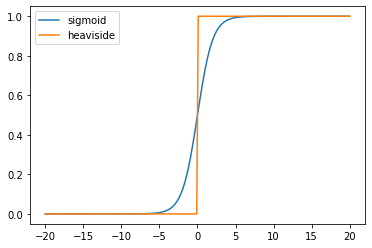

In [ ]:
z = linspace(-20,20, 200)
sigma = 1/(1+exp(-z))
h = heaviside(z,0.5)
fig, ax = plt.subplots()
ax.plot(z,sigma,label='sigmoid')
ax.plot(z, h,label='heaviside')
leg = ax.legend();

## Negative log likelihood 
The likelihood $L(\mathbf{w})= P(\{y^{(i)}\}_{i=1}^N | \{\mathbf{x}^{(i)}\}_{i=1}^N, \mathbf{w})=\Pi_{i=1}^N P(y^{(i)}|\mathbf{x}^{(i)} ,\mathbf{w} )$ because the dataset are sampled in i.i.d manner.


We estimate the parameters of a logistic regression model using
maximum likelihood estimation.So negative log likelihood  will be the loss function. For the training data $\{\mathbf{x}^{(i)},y^{(i)}\}_{i=1,\dots, N}$
\begin{align} \text{NLL}(\mathbf{w})&=- \log\Pi_{i=1}^N\{[\sigma(\mathbf{x}^{(i)}\mathbf{w} )]^{y^{(i)}}[1-\sigma(\mathbf{x}^{(i)}\mathbf{w} )]^{1-y^{(i)}}\}\\
&=-\sum_{i=1}^N[y^{(i)} \log\sigma(\mathbf{x}^{(i)}\mathbf{w}) + (1-y^{(i)})\log(1-\sigma(\mathbf{x}^{(i)}\mathbf{w}))]
\end{align} 

### Cross entropy loss

- For Bernoulli distributions $\mathbf{p}=(p, 1-p)$ and $\mathbf{q}=(q, 1-q)$, the cross entropy is
$$H(\mathbf{p},\mathbf{q}) =-p_1\log(q_1) - (1-p_1) \log(1-q_1) $$

- Cross entropy $H(\mathbf{p}, \mathbf{q})$ measures the dissimilarity between two probability
distributions.

- With fixed $\mathbf{p}$, $H(\mathbf{p}, \mathbf{q})$ is minimized at $\mathbf{q}=\mathbf{p}$. 

-  Proof: Set $\frac{\partial H}{\partial q_1}=-\frac{p_1}{q_1}+\frac{1-p_1}{1-q_1}=0$, so $q_1=p_1$. Calculate $\frac{\partial^2 H}{\partial q_1^2}>0$ to show this is minimum. 



The gradient of the NLL is given by 
\begin{align}
\nabla_{\mathbf{w}}\text{NLL}(\mathbf{w})&=-\sum_{i=1}^N\Big(\frac{y^{(i)}}{\sigma( \mathbf{x}^{(i)}\mathbf{w})} (1-\sigma(\mathbf{x}^{(i)}\mathbf{w} ))\sigma(\mathbf{x}^{(i)}\mathbf{w} ) (\mathbf{x}^{(i)})^\top \\
&+ \frac{1-y^{(i)}}{1-\sigma(\mathbf{x}^{(i)}\mathbf{w})}(-1+\sigma(\mathbf{x}^{(i)}\mathbf{w} ))\sigma( \mathbf{x}^{(i)}\mathbf{w}) (\mathbf{x}^{(i)})^\top \Big)\\
&=-\sum_{i=1}^N \Big(y^{(i)}(1-\sigma(\mathbf{x}^{(i)}\mathbf{w} ))(\mathbf{x}^{(i)})^\top - (1-y^{(i)})\sigma(\mathbf{x}^{(i)}\mathbf{w} )(\mathbf{x}^{(i)})^\top\Big) \\
&= \sum_{i=1}^N \underbrace{\left(\sigma( \mathbf{x}^{(i)}\mathbf{w})- y^{(i)}\right)(\mathbf{x}^{(i)})^\top}_{=\nabla L_i(\mathbf{w})} = \mathbf{X}^\top \text{diag}(\mathbf{\sigma}(\mathbf{Xw})- \mathbf{y})\mathbb{1}_N 
\end{align}

We can show the Hessian is positive definite, that implies the loss function is strongly convex. Intuitvely this means that the NLL has a bowl shape, with a unique lowest point. 

## Stochastic Gradient descent
Solve the following optimization problem. 
$$\hat{\mathbf{w}}=\text{arg}\min_{\mathbf{w}}\text{NLL}(\mathbf{w})$$

The simplest is to use stochastic gradient descent. If we use a minibatch of size 1, then we get the following simple update equation:

$$ \mathbf{w}_{t+1}=\mathbf{w}_t-\eta_t(\sigma( \mathbf{x}^{(i)}\mathbf{w})- y^{(i)})(\mathbf{x}^{(i)})^\top$$

### Mini-batches
In each iteration, randomly sample mini-batch $\mathcal{B}_t\subset \{1,\dots, N\}$ of fixed size $|\mathcal{B}_t|$.

Evaluate and sum up and average gradient of sample loss functions: 
$$ \mathbf{w}_{t+1}=\mathbf{w}_t-\frac{\eta_t}{|\mathcal{B}_t|} \sum_{i\in \mathcal{B}_t}(\sigma(\mathbf{x}^{(i)}\mathbf{w} )- y^{(i)})(\mathbf{x}^{(i)})^\top$$

Validity of SGD: the expectation is the true gradient, 
$$ \mathbb{E}\left[\frac{1}{|\mathcal{B}_t|}\sum_{i\in \mathcal{B}_t }\nabla L_i(\mathbf{w})  \right]=\frac{1}{n}\sum_{i=1}^n\nabla L_i(\mathbf{w})$$

In [ ]:
# calculate the prob with y=1
def prob(x, w):
	z = x.dot(w)

	return 1.0 / (1.0 + exp(-z))


[[ 1.          2.7810836   2.550537  ]
 [ 1.          1.46548937  2.36212508]
 [ 1.          3.39656169  4.40029353]
 [ 1.          1.38807019  1.85022032]
 [ 1.          3.06407232  3.00530597]
 [ 1.          7.62753121  2.75926224]
 [ 1.          5.33244125  2.08862677]
 [ 1.          6.92259672  1.77106367]
 [ 1.          8.67541865 -0.24206865]
 [ 1.          7.67375647  3.50856301]]


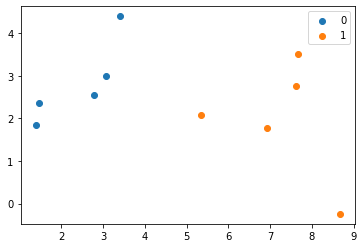

In [ ]:
dataset = array([[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]])
fig, ax = plt.subplots()
ax.scatter(dataset[0:5,0],dataset[0:5,1],label='0')
ax.scatter(dataset[5:10,0],dataset[5:10,1],label='1')
leg = ax.legend();

X = hstack([ones((dataset.shape[0],1)), dataset[:,0:2] ])
y = dataset[:,2]
print(X)


In [ ]:
def cross_entropy_loss(probability, y):
  if y == 1:
    return -y*log(probability)
  else:
    return -(1-y)*log(1-probability)


In [ ]:
# Estimate logistic regression coefficients using stochastic gradient descent

def train_weights(X, y, l_epoch_span, n_epoch, threshold=0.002):
  n, d    = X.shape
  sum_error_store = []
  weights = np.zeros(d) # Initial condition is always 0 vector. it is a bad idea! 
  # you should modify this code to make IC as an input. Then you can call this call function put the last weight as the new initial condition.
  for epoch in range(n_epoch):
    l_rate   = l_epoch_span[epoch]
    sum_error = 0;
    arr = np.arange(n)
    random.shuffle(arr)
    for i in arr:
      probability = prob(X[i,:], weights)
      error      = probability - y[i]
      #sum_error  = error**2 + sum_error
      sum_error  = cross_entropy_loss(probability, y[i]) + sum_error
      weights    = weights - l_rate * error * X[i,:]
    sum_error_store.append(sum_error)  
    print('sum_error at ',epoch+1, 'epoch is ', sum_error)
    if sum_error<threshold:
      break


  return weights, sum_error_store

In [ ]:

n_epoch = 50
n_span = arange(n_epoch)
l_epoch_span = 1/((1+2 * n_span)**1) 
#print(l_rate_span)
weights, sum_error_store = train_weights(X, y, l_epoch_span, n_epoch) #you should restart with the new IC. 
print(weights)


sum_error at  1 epoch is  30.55275455617529
sum_error at  2 epoch is  0.011164390011987317
sum_error at  3 epoch is  0.010784988510259594
sum_error at  4 epoch is  0.010572715802137327
sum_error at  5 epoch is  0.010426896439375031
sum_error at  6 epoch is  0.010317529938947035
sum_error at  7 epoch is  0.010230417746562255
sum_error at  8 epoch is  0.010158290246257463
sum_error at  9 epoch is  0.01009693865258535
sum_error at  10 epoch is  0.010043729613645844
sum_error at  11 epoch is  0.009996851858516141
sum_error at  12 epoch is  0.009955065819116805
sum_error at  13 epoch is  0.00991736924818964
sum_error at  14 epoch is  0.009883086856228511
sum_error at  15 epoch is  0.00985170415127449
sum_error at  16 epoch is  0.00982276759422127
sum_error at  17 epoch is  0.00979596857051291
sum_error at  18 epoch is  0.00977102275529729
sum_error at  19 epoch is  0.009747687865309612
sum_error at  20 epoch is  0.009725787333363906
sum_error at  21 epoch is  0.00970517300530608
sum_error a

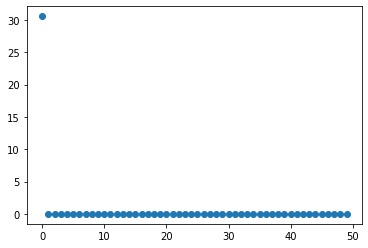

In [ ]:
plt.scatter(arange(len(sum_error_store)), sum_error_store)
plt.show()

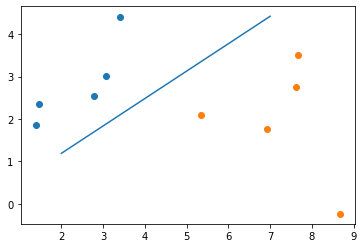

In [ ]:

x_span = linspace(2,7,100)
y_span = -(weights[0] + weights[1] * x_span)/weights[2]
fig, ax = plt.subplots()
ax.scatter(dataset[0:5,0],dataset[0:5,1],label='0')
ax.scatter(dataset[5:10,0],dataset[5:10,1],label='1')
plt.plot(x_span, y_span)
plt.show()

- Both perceptron and logistic model learn a linear decision boundary for
binary classification.

- Logistic model reflects the confidence levels of predictions, while
perceptron does not.

- Logistic regression permits smooth and convex minimization, which is
much easier to solve by standard approach like stochastic gradient descent

## Let's try some more complicated dataset. 

In [ ]:
from sklearn import datasets

# Load datset
iris = datasets.load_iris()
train_x = iris["data"][:, (2, 3)]

# 1 if Iris-Virginica, else 0
train_y = (iris["target"] == 2).astype(int)

train_x = train_x[50:]
train_y = train_y[50:]

In [ ]:
print(train_x.shape)
print(train_y)

(100, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
X =hstack([ones((train_x.shape[0],1)), train_x ])

In [ ]:
X

In [ ]:
n_epoch = 150
n_span = arange(n_epoch)
l_epoch_span = ones(n_epoch)*0.3
#print(l_rate_span)
weights, sum_error_store = train_weights(X, train_y, l_epoch_span, n_epoch) #you should restart with the new IC. 
print(weights)

In [ ]:
x_span = linspace(3,7,100)
y_span = -(weights[0] + weights[1] * x_span)/weights[2]


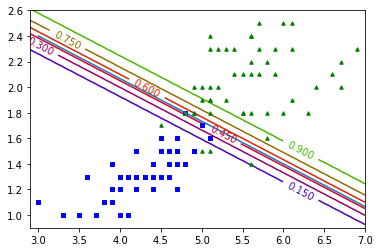

In [ ]:
# apply test data.
x1_test = linspace(2.9,7,100)
x2_test = linspace(0.9,2.6,40)
[X1, X2]=meshgrid(x1_test, x2_test)
Xtest = c_[X1.ravel(), X2.ravel()]
Xtest =hstack([ones((Xtest.shape[0],1)), Xtest ])
probility = prob(Xtest, weights)
prob_reshape = probility.reshape(X1.shape)

fig, ax = plt.subplots(1, 1)
ax.plot(train_x[train_y == 0,0],train_x[train_y == 0,1], "bs", markersize=3.5)
ax.plot(train_x[train_y == 1,0],train_x[train_y == 1,1], "g^", markersize=3.5)
contour = ax.contour(X1, X2, prob_reshape, cmap=plt.cm.brg)
ax.clabel(contour, inline=1)
plot(x_span, y_span)
plt.show()



## Multiclass classification
Binary vs. Multiclass logistic regression
- binary logistic regression has a single output that can predict two classes.

- multiclass logistic regression has multiple outputs, each of which is used to predict a single class

For example, Handwritten digits recognition
- Input $\mathbf{x}\in \mathbb{R}^{28\times 28}$: gray intensity values of the pixels, from 0 (black) to 255(white).

- Label $\mathbf{y}\in \mathbb{R}^{10}$ one hot vector: true class of the digit. $y_j=1$ if $\mathbf{x}\in \text{class } j$. Can be viewed as a multinoulli probability distribution.



### Softmax activation
softmax activation function $\sigma: \mathbb{R}^K \rightarrow \mathbb{R}^K$ for $K-$class classification, defined as 
$$ \vec\sigma(\mathbf{z})=\left[\frac{\exp(z_1)}{\sum_{j=1}^K \exp(z_j)}, \dots, \frac{\exp(z_K)}{\sum_{j=1}^K \exp(z_j)}\right]$$

- $\sum_{i=1}^K{\sigma_i}(\mathbf{z})=1$, it is a multinoulli probability distribution.

- if $z_j = \max\{z_1, \dots, z_K\}$, then $\sigma_j(\mathbf{z})=\max\{\sigma_1(\mathbf{z}), \dots, \sigma_K(\mathbf{z})\}$.

For image data, stack the input matrix into a row vector $\mathbf{x}$(add the intercept term). The model outputs the predicted probabilities for the $K$ classes:

$$\vec\sigma(\mathbf{x}\mathbf{W}) = \vec \sigma\left(\begin{bmatrix}\mathbf{x}\mathbf{w}_1 \\ \vdots  \\  \mathbf{x}\mathbf{w}_K \end{bmatrix}^\top\right)=\begin{bmatrix} \frac{\exp( \mathbf{x}\mathbf{w}_1)}{\sum_{j=1}^K \exp( \mathbf{x}\mathbf{w}_j)} \\ \vdots  \\ \frac{\exp(\mathbf{x}\mathbf{w}_K)}{\sum_{j=1}^K \exp( \mathbf{x}\mathbf{w}_j)} \end{bmatrix}^\top\in(0,1)^K$$

where weight matrix $\mathbf{W}\in \mathbb{R}^{d\times K}$ and $\mathbf{w}_j$ is the $j$-th column of $\mathbf{W}$. 



---

Prediction: find the index $j$ associated with the max component of
$\vec\sigma(\mathbf{x}\mathbf{W})$ (highest predicted probability), i.e, 
$$j = \text{arg}\max_{1\le c \le K}\sigma_j(\mathbf{x}\mathbf{W}) $$
Then predict $\mathbf{x}\in \text{Class } j$.


<img src="https://github.com/yexf308/MAT592/blob/main/image/MNIST_LR.png?raw=true" width="1000" />

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))


11501568/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


[5 0 4 1 9 2 1 3 1]


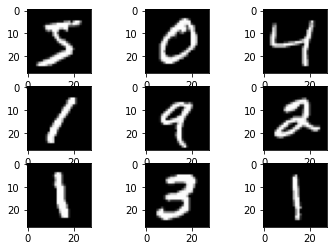

In [ ]:

fig, axs = plt.subplots(3, 3)
axs = axs.ravel()
for i in range(9):
    axs[i].imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
print(train_y[0:9])

### Negative log likelihood 
In handwritten digits recognition, 
$K=10, d=28^2+1=785, N=6\times 10^4$.

Define the probability matrix is
$$\Sigma(\mathbf{X}\mathbf{W})=\begin{bmatrix}\vec\sigma(\mathbf{x}^{(1)}\mathbf{W}) \\ \dots \\ \vec\sigma(\mathbf{x}^{(N)}\mathbf{W}) \end{bmatrix}\in\mathbb{R}^{N\times K}$$ 

The true label matrix is 
$$ \mathbf{Y} = \begin{bmatrix} \mathbf{y}^{(1)}\\ \dots \\ \mathbf{y}^{(N)}\end{bmatrix}\in \mathbb{R}^{N\times K} $$

The negative log likelihood (NLL) is 
\begin{align} \text{NLL}(\mathbf{W})&=-\log \Pi_{i=1}^N\Pi_{j=1}^K\Sigma(\mathbf{X}\mathbf{W})_{ij}^{\mathbf{Y}_{ij}} \\
&=-\sum_{i=1}^N\sum_{j=1}^K \mathbf{Y}_{ij} \log\Sigma(\mathbf{X}\mathbf{W})_{ij}= \sum_{i=1}^N H(\mathbf{Y}_{i}, \Sigma(\mathbf{X}\mathbf{W})_{i} ) \\
&=  \sum_{i=1}^N H(\mathbf{y}^{(i)}, \vec\sigma(\mathbf{x}^{(i)}\mathbf{W}))
\end{align}

The gradient of NLL is 

\begin{align}
\nabla_{\mathbf{W}}\text{NLL}(\mathbf{W})= \sum_{i=1}^N  (\mathbf{x}^{(i)})^\top \left(\vec\sigma(\mathbf{x}^{(i)}\mathbf{W}) - \mathbf{y}^{(i)}\right)
\end{align}